# A prefeitura e os seus gastos declarados no combate a COVID-19

http://www.transparencia.feiradesantana.ba.gov.br/index.php?view=covid19


In [88]:
import pandas as pd
import matplotlib.pyplot as plt


despesas = pd.read_csv('gastos-covid19-prefeitura.csv')
despesas.head()

,action,company_or_person,crawled_at,crawled_from,date,document,function,group,number,phase,process_number,published_at,resource,subfunction,summary,type_of_process,value
0,2291 - Enfrentamento da Emergencia Coronavirus...,CIDADE PROPAGANDA E MARKETING,2020-05-18 14:58:29.565075,http://www.transparencia.feiradesantana.ba.gov...,13/05/2020,06.955.452/0001-03,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,11,LIQUIDAÇÃO,237-2019,13/05/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADES COVID 1...,Pregao,"R$ 39.735,00"
1,2291 - Enfrentamento da Emergencia Coronavirus...,NORLIMP COMERCIAL ATACADISTA DE COSM. E PRODUT...,2020-05-18 14:58:29.578282,http://www.transparencia.feiradesantana.ba.gov...,11/05/2020,00.990.097/0001-27,10 - SAUDE,339030999900000000 - Materiais de Consumo - Ou...,1,LIQUIDAÇÃO,334-2020-11D,11/05/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,REF AQUISICAO DE MATERIAL DE CONSUMO P/ O COMB...,Dispensa,"R$ 274.460,00"
2,os 2291 - Enfren...,RN COSTA COMERCIAL LTDA,2020-05-18 14:58:29.580821,http://www.transparencia.feiradesantana.ba.gov...,14/05/2020,12.812.660/0001-56,10 - SAUDE,449052040000000000 - Bens Moveis- Moveis e Ute...,1,LIQUIDAÇÃO,NaN,14/05/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,AQUISICAO DE MATERIAL PARA O COMBATE AO COVID...,Isento,"R$ 111.450,00"
3,cos 2291 - Enfren...,RN COSTA COMERCIAL LTDA,2020-05-18 14:58:29.583275,http://www.transparencia.feiradesantana.ba.gov...,14/05/2020,12.812.660/0001-56,10 - SAUDE,449052061200000000 - Aparelhos e utensilios do...,4223,PAGAMENTO,332-2020-11D,14/05/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,AQUISICAO DE MATERIAL PARA O COMBATE AO COVID...,Dispensa,"R$ 30.950,00"
4,os 2291 - Enfren...,RN COSTA COMERCIAL LTDA,2020-05-18 14:58:29.585891,http://www.transparencia.feiradesantana.ba.gov...,14/05/2020,12.812.660/0001-56,10 - SAUDE,449052040000000000 - Bens Moveis- Moveis e Ute...,4224,PAGAMENTO,NaN,14/05/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,AQUISICAO DE MATERIAL PARA O COMBATE AO COVID...,Isento,"R$ 111.450,00"


In [89]:
colunas = ['crawled_at', 'crawled_from']
despesas.drop(colunas, inplace=True, axis=1)


def currency_to_float(value):
    """Converte de R$ 69.848,70 (str) para 69848.70 (float)."""
    try:
        cleaned_value = value.replace("R$", "").replace(".", "").replace(",", ".")
        return float(cleaned_value)
    except ValueError:
        pass
    return

despesas['value'] = despesas['value'].apply(currency_to_float)

despesas = despesas.sort_values('date', ascending=False)
despesas.head()

,action,company_or_person,date,document,function,group,number,phase,process_number,published_at,resource,subfunction,summary,type_of_process,value
64,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,29/04/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,18,LIQUIDAÇÃO,237-2019,29/04/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,3910.23
136,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,28/04/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,11,LIQUIDAÇÃO,237-2019,28/04/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,28089.17
120,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,28/04/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,12,LIQUIDAÇÃO,237-2019,28/04/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,9000.00
121,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,28/04/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,15,LIQUIDAÇÃO,237-2019,28/04/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,6750.00
66,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,28/04/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,17,LIQUIDAÇÃO,237-2019,28/04/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,21376.26


In [90]:
# disponível em: https://gist.github.com/anapaulagomes/379525586f941a1183aa448dad282f90#file-especificacao-despesas-tcm-bahia-csv

classificacao = pd.read_csv(
    'especificacao-despesas-tcm-bahia.csv',
    dtype={'Codigo': str, 'Descricao': str, 'Codigo Superior': str}
)
classificacao

,Codigo,Descricao,Codigo Superior
0,30000000,Despesas Correntes,0
1,31000000,Pessoal e Encargos Sociais,30000000
2,31300000,Transferências a Estados e ao Distrito Federal,31000000
3,31301100,Vencimentos e Vantagens Fixas - Pessoal Civil,31300000
4,31301101,Vencimento e vantagens fixas Pessoal Civil (Ve...,31301100
...,...,...,...
2479,77999999,Reserva Orçamentária do RPPS,77999900
2480,88880000,Recursos Provenientes de Veto,0
2481,88888800,Recursos Provenientes de Veto,88880000
2482,99999900,Reservas,0


In [91]:
despesas['classificacao'] = despesas['group'].str.extract('(\d{8})')

despesas_com_classificacao = despesas.merge(classificacao, left_on=['classificacao'], right_on=['Codigo'], how='left')
despesas_com_classificacao

,action,company_or_person,date,document,function,group,number,phase,process_number,published_at,resource,subfunction,summary,type_of_process,value,classificacao,Codigo,Descricao,Codigo Superior
0,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,29/04/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,18,LIQUIDAÇÃO,237-2019,29/04/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,3910.23,33903901,33903901,Publicidade e Propaganda,33903900
1,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,28/04/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,11,LIQUIDAÇÃO,237-2019,28/04/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,28089.17,33903901,33903901,Publicidade e Propaganda,33903900
2,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,28/04/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,12,LIQUIDAÇÃO,237-2019,28/04/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,9000.00,33903901,33903901,Publicidade e Propaganda,33903900
3,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,28/04/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,15,LIQUIDAÇÃO,237-2019,28/04/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,6750.00,33903901,33903901,Publicidade e Propaganda,33903900
4,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,28/04/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,17,LIQUIDAÇÃO,237-2019,28/04/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,21376.26,33903901,33903901,Publicidade e Propaganda,33903900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,04/05/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,3682,PAGAMENTO,237-2019,04/05/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,5925.00,33903901,33903901,Publicidade e Propaganda,33903900
138,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,04/05/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,3676,PAGAMENTO,237-2019,04/05/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,9000.00,33903901,33903901,Publicidade e Propaganda,33903900
139,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,04/05/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,3677,PAGAMENTO,237-2019,04/05/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,28089.17,33903901,33903901,Publicidade e Propaganda,33903900
140,2291 - Enfrentamento da Emergencia Coronavirus...,A.C.PROPAGANDA LTDA.,04/05/2020,02.811.243/0001-35,10 - SAUDE,339039010000000000 - Publicidades e Propaganda,3683,PAGAMENTO,237-2019,04/05/2020,0014 - TRANSF. REC. SUS,122 - ADMINISTRACAO GERAL,PRESTACAO DE SERVICOS EM PUBLICIDADE COVID 19...,Pregao,21376.26,33903901,33903901,Publicidade e Propaganda,33903900


In [92]:
despesas.shape, despesas_com_classificacao.shape

((142, 16), (142, 19))

In [93]:
despesas.groupby('process_number').count()

despesas.groupby(['process_number', 'phase'])['value'].sum().to_frame()

value
process_number phase                 
237-2019       EMPENHO     1585000.00
               LIQUIDAÇÃO   812270.93
               PAGAMENTO   1186257.32
316-2020-11D   EMPENHO      395342.40
317-2020-11D   PAGAMENTO     95700.00
332-2020-11D   LIQUIDAÇÃO    89350.00
               PAGAMENTO     89350.00
334-2020-11D   LIQUIDAÇÃO  1062220.00
               PAGAMENTO    696840.00
376-2020-11D   LIQUIDAÇÃO    29400.00
               PAGAMENTO     29400.00

In [94]:
import seaborn as sns
sns.set_style("whitegrid")

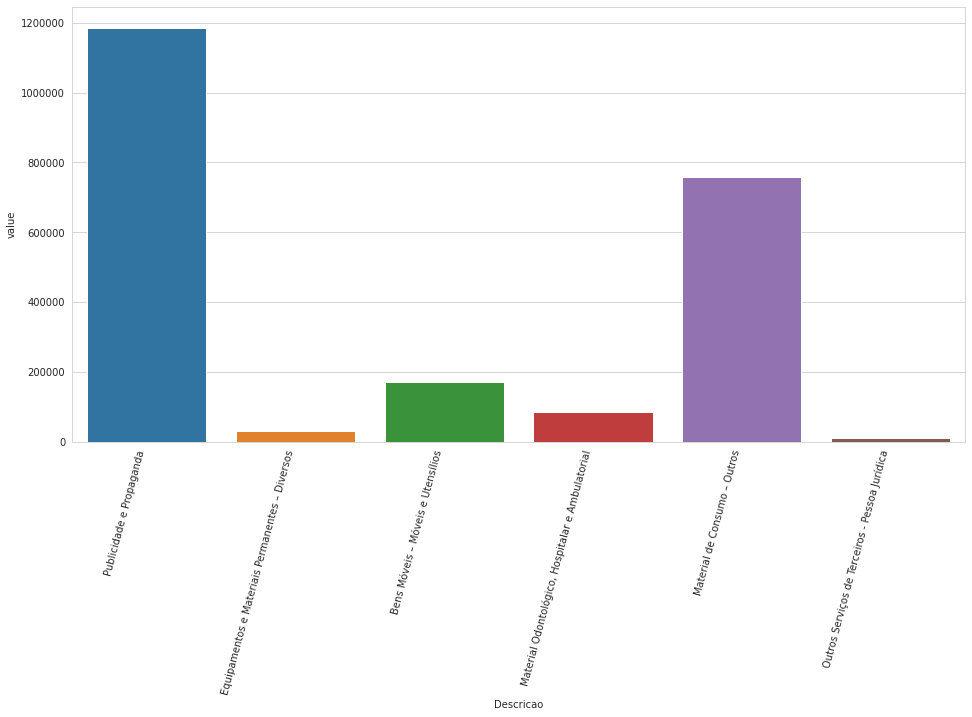

In [95]:
pagamentos = despesas_com_classificacao[despesas_com_classificacao['phase'] == 'PAGAMENTO']

plt.figure(figsize=(16,8))
plot = sns.barplot(
    x=pagamentos['Descricao'],
    y=pagamentos.value,
    estimator=sum,
    log=False,
    ci=None,
)
plot.set_xticklabels(plot.get_xticklabels(), rotation=75, horizontalalignment='right')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [96]:
pagamentos.groupby(
    ['company_or_person']
)['value'].sum().to_frame()

,value
company_or_person,
4MBR COM. E REPRES MAT MED LTD,29400.00
A.C.PROPAGANDA LTDA.,684161.61
AGENCIA COMUN. EIRELI,13322.00
C. F. DE ALMEIDA CIA. LTDA.,12000.00
CIDADE PROPAGANDA E MARKETING,488773.71
H3 PHARMA COMERCIO E SERVICOS LTDA,95700.00
NORLIMP COMERCIAL ATACADISTA DE COSM. E PRODUTOS DE PERFUMARIA LTDA,696840.00
O L SIMONELI,23345.00
RN COSTA COMERCIAL LTDA,200800.00


In [97]:
pagamentos.groupby(
    ['Descricao']
)['value'].sum().to_frame()

,value
Descricao,
Bens Móveis – Móveis e Utensílios,169850.00
Equipamentos e Materiais Permanentes – Diversos,30950.00
"Material Odontológico, Hospitalar e Ambulatorial",86400.00
Material de Consumo – Outros,758885.00
Outros Serviços de Terceiros - Pessoa Jurídica,12000.00
Publicidade e Propaganda,1186257.32


In [98]:
print(pagamentos.describe())

# 64 pagamentos. Menor: 375 Maior: 365380.00
# Total: 2.244.342,32

print(pagamentos['value'].sum())

           number          value
count    64.00000      64.000000
mean   3817.21875   35067.848750
std     245.74296   59020.562342
min    3478.00000     375.000000
25%    3622.75000    6353.850000
50%    3954.50000   13600.000000
75%    3970.25000   43315.425000
max    4225.00000  365380.000000
2244342.32


In [99]:
# despesas_com_classificacao.to_csv('despesas-covid19-prefeitura.csv')
# https://drive.google.com/file/d/1SAkAuGuOnuBTC5KT133lJhsYCm40Hfxc/view?usp=sharing